# Projeto do Curso de Python para Análise de Dados

## Projeto 01 - Unicórnios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dados = pd.read_csv('Startups+in+2021+end.csv')
dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
dados.shape

(936, 8)

In [ ]:
dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
dados.rename(columns= {
    'Unnamed: 0':'Id'
},inplace = True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


Podemos ver que a coluna de Valuation e a Data estão como objeto.
Portanto será necessário alterar os tipos das Colunas

In [ ]:
dados.isnull().sum() # Temos 15 linhas com cidades nulas e 1 linha com investidor Nulo

Id                   0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

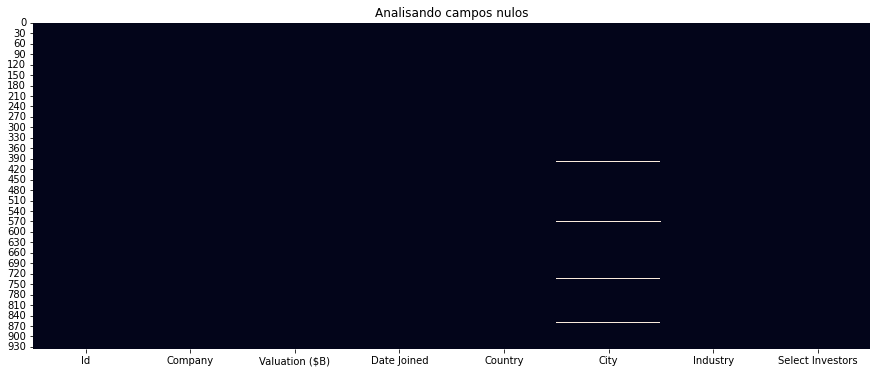

In [ ]:
# Visualizando campos nulos de forma gráfica.....

plt.figure(figsize = (15,6))
plt.title('Analisando campos nulos')
sns.heatmap(dados.isnull(),cbar=False);

In [ ]:
# Campos unicos da base de dados....

dados.nunique()

Id                  936
Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
dtype: int64

In [ ]:
# Com essa função é possível visualizar num array todos os valores únicos de uma coluna

dados.Industry.unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
# É possível contar quantas vezes um valor aparece com o value counts
dados.Industry.value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

In [ ]:
# Tbm podemos ter esse valor em percentual
dados.Industry.value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Industry, dtype: float64

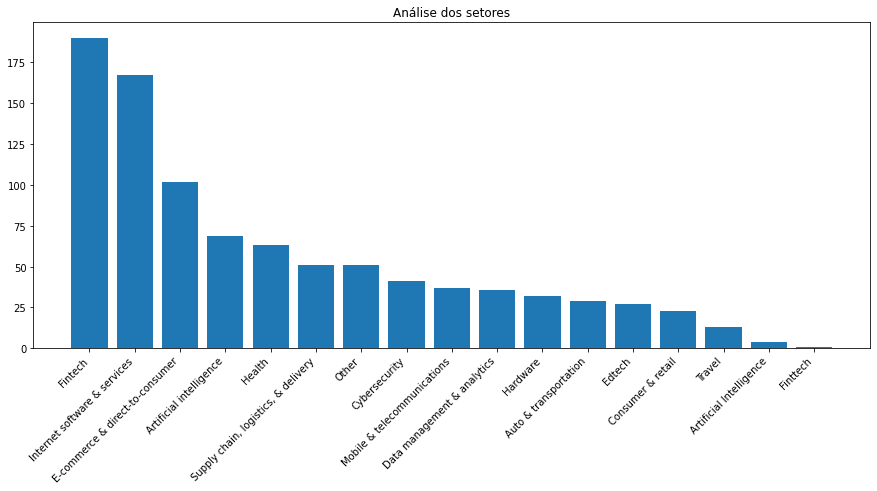

In [ ]:
# Trazendo isso para uma visualização gráfica...

plt.figure( figsize = (15,6))
plt.title('Análise dos setores')
plt.bar(dados['Industry'].value_counts().index,dados['Industry'].value_counts())
plt.xticks ( rotation = 45 , ha = 'right');

In [ ]:
Analise = round(dados['Country'].value_counts(normalize = True)*100,)
Analise

United States           51.0
China                   18.0
India                    5.0
United Kingdom           4.0
Germany                  2.0
Israel                   2.0
France                   2.0
Canada                   2.0
Brazil                   2.0
South Korea              1.0
Singapore                1.0
Hong Kong                1.0
Japan                    1.0
Australia                1.0
Mexico                   1.0
Netherlands              1.0
Indonesia                0.0
Spain                    0.0
Sweden                   0.0
Switzerland              0.0
Ireland                  0.0
United Arab Emirates     0.0
Norway                   0.0
Belgium                  0.0
Thailand                 0.0
Denmark                  0.0
Philippines              0.0
Finland                  0.0
Colombia                 0.0
South Africa             0.0
Turkey                   0.0
Austria                  0.0
Chile                    0.0
Malaysia                 0.0
Czech Republic

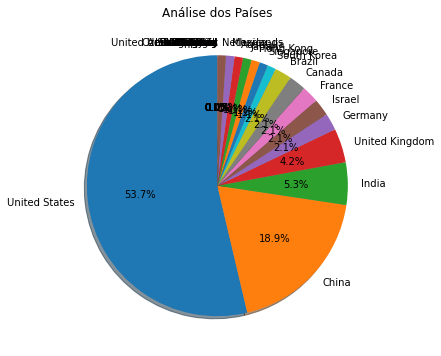

In [ ]:
plt.figure( figsize = (15,6))
plt.title('Análise dos Países')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
);

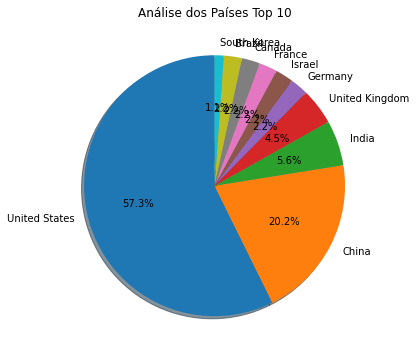

In [ ]:
# Top 10 de países geradores de unicórnios

plt.figure( figsize = (15,6))
plt.title('Análise dos Países Top 10')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
);

## Arrumando o problema com o formato da Coluna de Data

In [ ]:
dados['Date Joined'] = pd.to_datetime(dados['Date Joined'])
dados['Date Joined']

0     2017-04-07
1     2012-12-01
2     2014-01-23
3     2011-12-12
4     2018-01-08
         ...    
931   2021-12-06
932   2021-12-07
933   2021-12-01
934   2021-12-01
935   2021-12-07
Name: Date Joined, Length: 936, dtype: datetime64[ns]

In [ ]:
dados ['Month'] = pd.DatetimeIndex(dados['Date Joined']).month
dados ['Year'] = pd.DatetimeIndex(dados['Date Joined']).year

dados.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
Agrupamento = dados.groupby(by=['Country','Year','Month','Company']).count()['Id'].reset_index()

Agrupamento

,Country,Year,Month,Company,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [ ]:
Agrupamento.loc[Agrupamento['Country'] == 'Brazil']

,Country,Year,Month,Company,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


## Arrumando o Problema com o formato da Coluna de Valuation 

In [ ]:
# Aqui só o replace não soluciona o problema com o caractere '$', então chamamos a função lambda que percorre todas as linhas do meu DF para realizar a substituição

dados['Valuation ($B)'] = pd.to_numeric(dados['Valuation ($B)'].apply(lambda Linha: Linha.replace('$','')))
dados['Valuation ($B)']

0      140.0
1      100.3
2       95.0
3       45.6
4       40.0
       ...  
931      1.0
932      1.0
933      1.0
934      1.0
935      1.0
Name: Valuation ($B), Length: 936, dtype: float64

In [ ]:
Analise_Pais = dados.groupby( by = ['Country']).sum()['Valuation ($B)'].reset_index()
Analise_Pais.head()

,Country,Valuation ($B)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [ ]:
Analise_valuation = Analise_Pais.sort_values('Valuation ($B)',ascending= False)
Analise_valuation

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


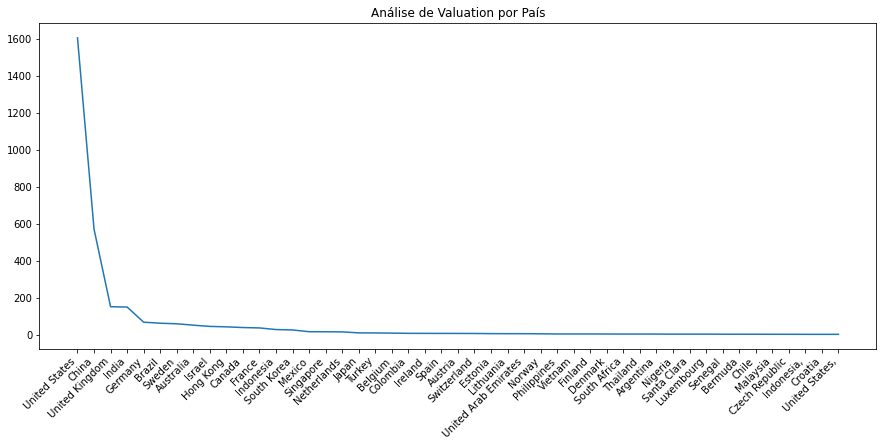

In [ ]:
# Top 10 de países geradores de unicórnios

plt.figure( figsize = (15,6))
plt.title('Análise de Valuation por País')
plt.plot(Analise_valuation['Country'],Analise_valuation['Valuation ($B)'])
plt.xticks ( rotation = 45 , ha = 'right');